In [14]:
test <- read.csv("D:/dataset/House_Prices/test.csv")
train <- read.csv("D:/dataset/House_Prices/train.csv")

In [15]:
dim(test)
dim(train)
head(test,3)
head(train,3)

[1] 1459   80

[1] 1460   81

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal


Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500


In [17]:
# test는 SalePrice가 없다.
dim(test)
dim(train)

[1] 1459   80

[1] 1460   81

In [21]:
test_labels <- test$Id
test$Id <- NULL             # 한열이 사라짐.
train$Id <- NULL            # 한열이 사라짐.
dim(test)
dim(train)
# train과 test의 열을 맞추고 all로 합치기
test$SalePrice <- NA
all <- rbind(train, test)
dim(all)
names(all)

[1] 1459   80

[1] 1460   80

[1] 2919   80

[1] "MSSubClass"    "MSZoning"      "LotFrontage"   "LotArea"      
 [5] "Street"        "Alley"         "LotShape"      "LandContour"  
 [9] "Utilities"     "LotConfig"     "LandSlope"     "Neighborhood" 
[13] "Condition1"    "Condition2"    "BldgType"      "HouseStyle"   
[17] "OverallQual"   "OverallCond"   "YearBuilt"     "YearRemodAdd" 
[21] "RoofStyle"     "RoofMatl"      "Exterior1st"   "Exterior2nd"  
[25] "MasVnrType"    "MasVnrArea"    "ExterQual"     "ExterCond"    
[29] "Foundation"    "BsmtQual"      "BsmtCond"      "BsmtExposure" 
[33] "BsmtFinType1"  "BsmtFinSF1"    "BsmtFinType2"  "BsmtFinSF2"   
[37] "BsmtUnfSF"     "TotalBsmtSF"   "Heating"       "HeatingQC"    
[41] "CentralAir"    "Electrical"    "X1stFlrSF"     "X2ndFlrSF"    
[45] "LowQualFinSF"  "GrLivArea"     "BsmtFullBath"  "BsmtHalfBath" 
[49] "FullBath"      "HalfBath"      "BedroomAbvGr"  "KitchenAbvGr" 
[53] "KitchenQual"   "TotRmsAbvGrd"  "Functional"    "Fireplaces"   
[57] "FireplaceQu"   "GarageType"    "GarageYrBlt"   "GarageFinish" 
[61] "GarageCars"    "GarageArea"    "GarageQual"    "GarageCond"   
[65] "PavedDrive"    "WoodDeckSF"    "OpenPorchSF"   "EnclosedPorch"
[69] "X3SsnPorch"    "ScreenPorch"   "PoolArea"      "PoolQC"       
[73] "Fence"         "MiscFeature"   "MiscVal"       "MoSold"       
[77] "YrSold"        "SaleType"      "SaleCondition" "SalePrice"

### categorical
<pre>
SalePrice - the property's sale price in dollars.(부동산의 가격-달러)
SSubClass: The building class (건물 클래스)
MSZoning: The general zoning classification (일반구역분류)
LotFrontage: Linear feet of street connected to property(?)
..
Street: Type of road access(도로의 접근 유형)
..
LandContour: Flatness of the property(부동산의 평평함)
... 
BldgType: Type of dwelling (거주 유형)
  1Fam  : 단독주택
  2fmCon : 2세대 전환, 원래 한가족
  Duplex : 듀플렉스
  Twnhs  :  타운 하우스 내부 단위
  TwnhsE  : 타운 하우스 엔드 Unit
</pre>

In [46]:
#table(all$MSSubClass)
#table(all$MSZoning)
#table(all$Street)
table(all$LandContour)  # Bnk  HLS  Low  Lvl
table(all$BldgType)


 Bnk  HLS  Low  Lvl 
 117  120   60 2622 


  1Fam 2fmCon Duplex  Twnhs TwnhsE 
  2425     62    109     96    227 

## 01. Distribution - Histogram

### SalePrice가 NA가 아닌 데이터 행 중에 SalePrice를 히스토그램 표시

In [47]:
library(ggplot2)

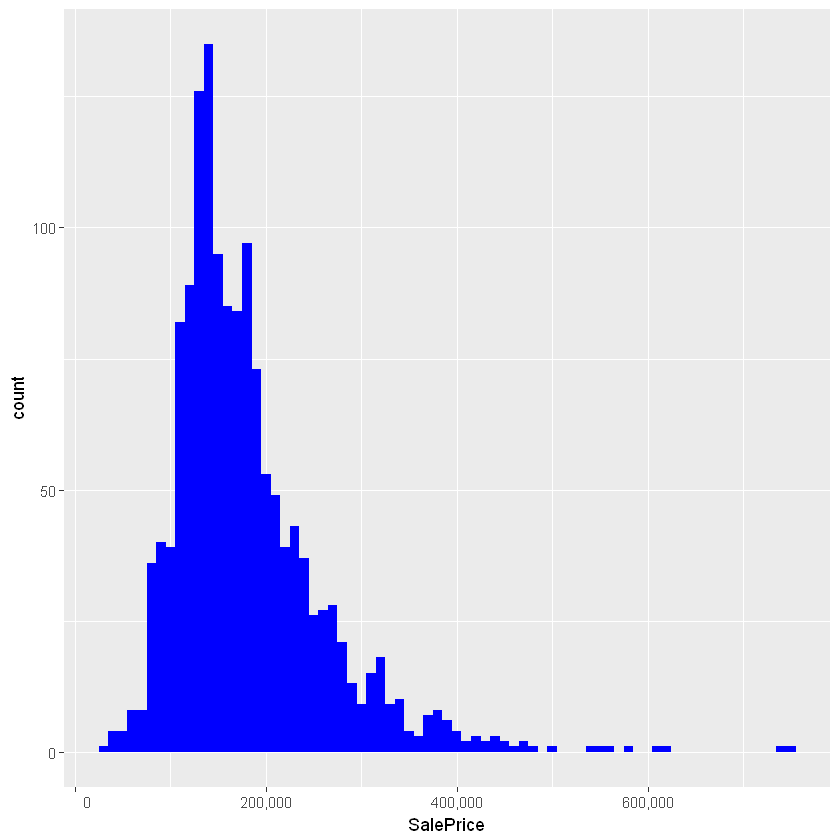

In [48]:
ggplot(data=all[!is.na(all$SalePrice),], aes(x=SalePrice)) +
        geom_histogram(fill="blue", binwidth = 10000) +
        scale_x_continuous(labels = function(x) format(x, big.mark = ",",
                                                       scientific = FALSE))
# scale_x_continuous(breaks= seq(0, 800000, by=100000), labels = comma) # old

## 02. Distribution - Violinplots
<pre>
A. Violinplot는 하나 또는 여러 그룹에 대한 숫자 변수의 분포를 시각화 가능하다.
B. 박스 플롯과 매우 비슷하나 <b>밀도를 더 깊이 이해</b>할 수 있다.
C. 데이터 양이 많고 개별 관찰이 불가능할 때 적용(Seaborn이 적합하다.)
</pre>


Grvl Pave 
  12 2907 

Warning message:
"Removed 1459 rows containing non-finite values (stat_ydensity)."

Warning message:
"Removed 1459 rows containing non-finite values (stat_ydensity)."

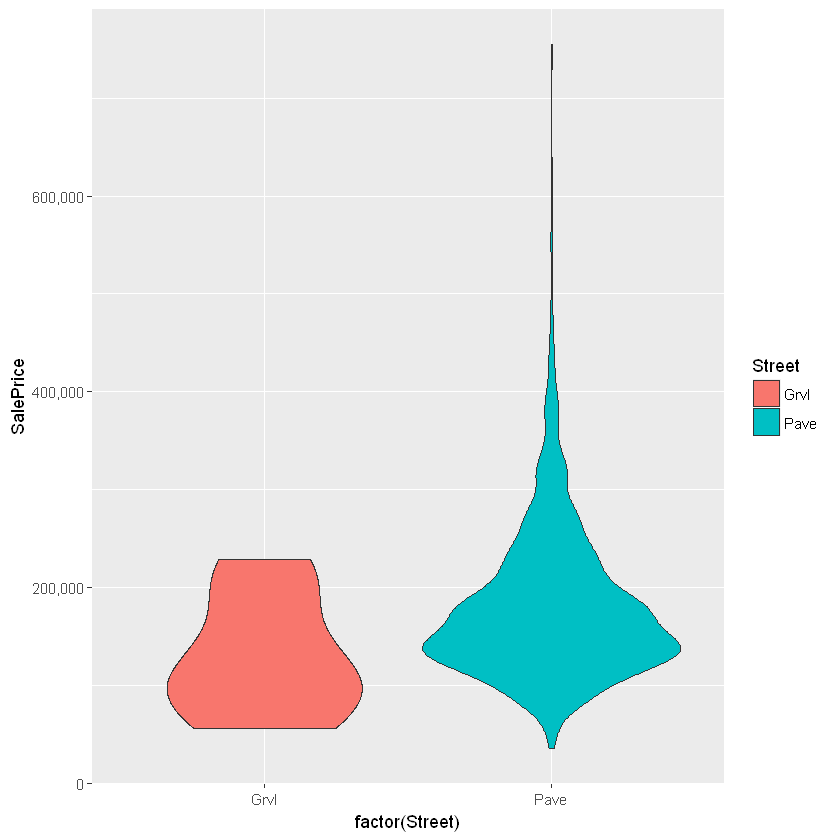

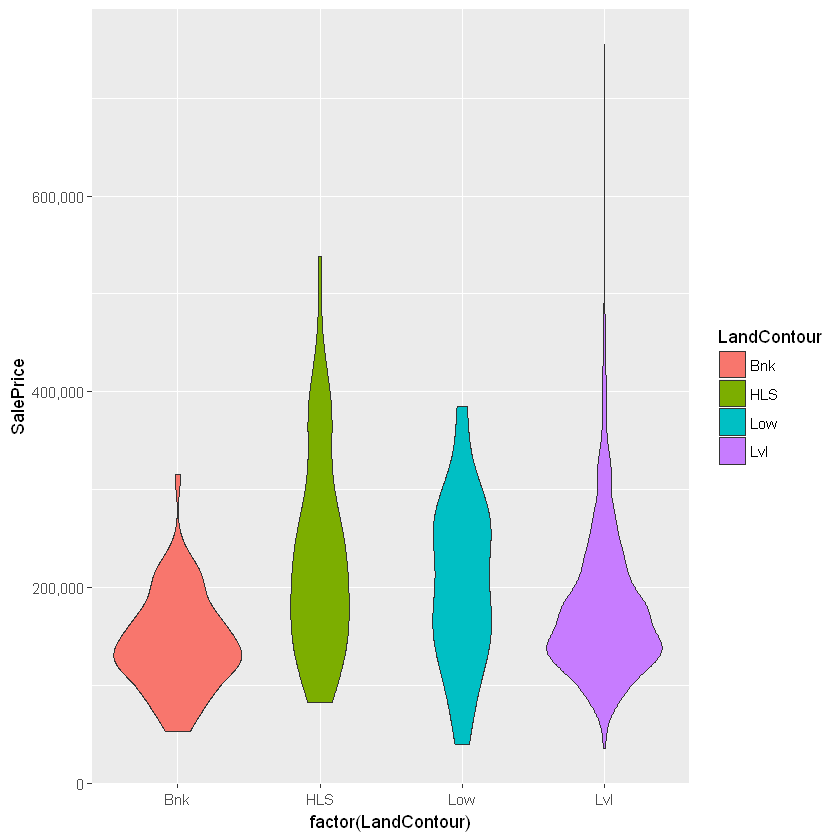

In [51]:
table(all$Street)

# Type of road access(도로의 접근 유형)에 따라 집값이 어떨지?
# First type of color
ggplot(all, aes(factor(Street), SalePrice)) + 
  geom_violin(aes(fill = Street)) + 
  scale_y_continuous(labels = function(x) format(x, big.mark = ",",
                                                       scientific = FALSE))
                     
# TFlatness of the property(부동산의 평평함)에 따라 집값이 어떨지?            
ggplot(all, aes(factor(LandContour), SalePrice)) + 
  geom_violin(aes(fill = LandContour)) + 
  scale_y_continuous(labels = function(x) format(x, big.mark = ",",
                                                       scientific = FALSE))

In [ ]:
## 03. Distribution - BoxPlot
<pre>
A. 
B. 박스 플롯과 매우 비슷하나 <b>밀도를 더 깊이 이해</b>할 수 있다.
C. 데이터 양이 많고 개별 관찰이 불가능할 때 적용(Seaborn이 적합하다.)
</pre>

### 확인 결과
<pre>
자갈(grvl)보다 pave가 약 10만달러 높아보인다.
부동산의 평평도 - HLS 가장 넓게 많은 경사(언덕에 위치)
   Bnk(평평하다)가 
</pre>

In [35]:
summary(all$SalePrice)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  34900  129975  163000  180921  214000  755000    1459 

## 02. Correlation - Correlogram
<pre>
상관 로그 또는 상관 행렬은 행렬의 숫자 변수 쌍 사이의 관계를 분석할 수 있게 한다.
각 변수 쌍 간의 상관 관계는 산점도를 통해 시각화됩니다.
</pre>

In [29]:
## Corr 확인 결과
numericVars <- which(sapply(all, is.numeric)) #index vector numeric variables
numericVarNames <- names(numericVars) #saving names vector for use later on
cat('There are', length(numericVars), 'numeric variables')

There are 37 numeric variables

In [31]:
library(corrplot)

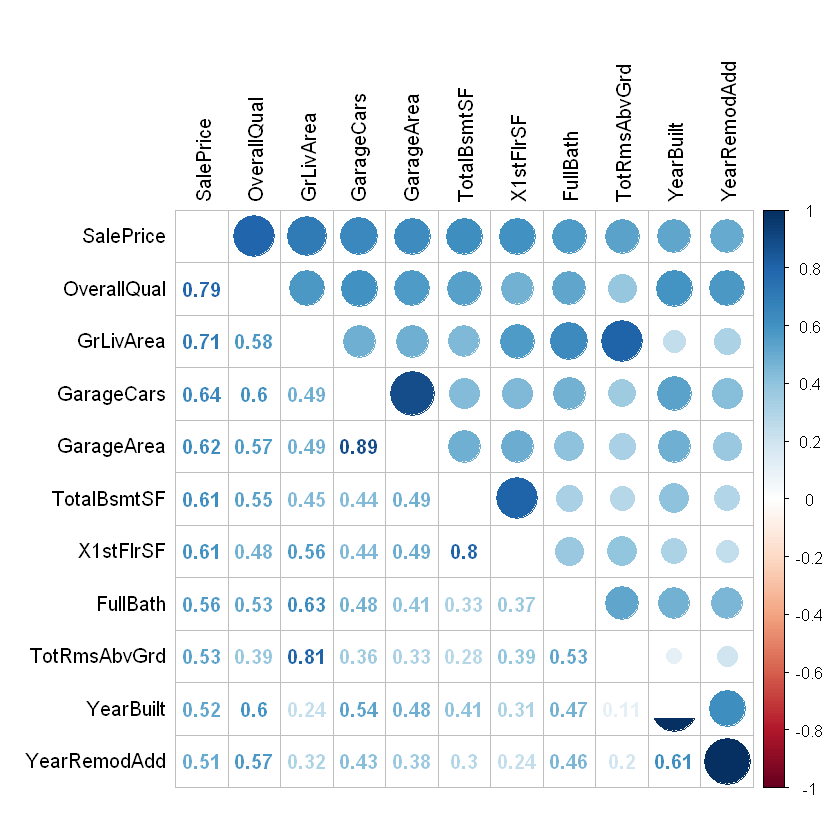

In [32]:
all_numVar <- all[, numericVars]
cor_numVar <- cor(all_numVar, use="pairwise.complete.obs") #correlations of all numeric variables

#sort on decreasing correlations with SalePrice
cor_sorted <- as.matrix(sort(cor_numVar[,'SalePrice'], decreasing = TRUE))
 #select only high corelations
CorHigh <- names(which(apply(cor_sorted, 1, function(x) abs(x)>0.5)))
cor_numVar <- cor_numVar[CorHigh, CorHigh]

corrplot.mixed(cor_numVar, tl.col="black", tl.pos = "lt")